In [1]:
import subprocess
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from moons1d.interface import run

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Markdown
%matplotlib inline 

plt.rcParams['figure.figsize'] = (12,4)

## Main notebook to run moons 1D

Simulates one object in one or all bands from an input template

###  Exemple 1 : Run moons 1D in one band 
The following code shows how to run moons1D:
  - using a template from a fits file
  - with observing parameters stored in a python dictionary 
  - normalized the template to a pivot wavelength (like the ETC)
  - computes expected spectrum in one band
  
#### Input template
The first argument of the run() function is the name of the template file. The file shall be a '.fits' witht the following format:


By default, the path for the template file is the working directory. To change folder modify the 'template_path' argument in the run() function 

#### Magnitude normalisation

`Vega_pivot` corresponds to a Vega magnitude and a normalisation at a pivot wavelength. The filters available for the `Vega_pivot` option (or `AB_pivot`) are "I", "J", "H". 

|Band|$\lambda_{ref}\,(\mu m)$ |$\Delta_{mag}^{Vega}$|
|---|---|---|
|I|0.797|+0.45|
|J|1.22|+0.91|
|H|1.63|+1.39|


In [2]:
template_file = 'input_stellar_template.fits' 
template_path = '../moons1d/models/Science/'

mag= 15.5 
mag_type = "Vega_pivot"
filter_name = "J"
type_source = "point-source"

#### Configure observing parameters
Observing parameters shall be store in a python dictionary with  the following keys:
- `"R_mode"`: Mandatory key. The `R_mode` key stores the resolution mode of MOONS (`str`): either "LR" for the low resolution mode or "HR" for the high resolution mode.
- `"band"`: Mandatory key. The keyword `band` stores the band of the simulated observation (`str`). Valid options are "RI", "YJ", "H"
-  `"OB_name"`: Name of the OB (`str`). Default is 'TestOB'.  This name will be use as prefix for the output files (fits and plots) and stored in the outpt fits header. 
- `"NDIT"`: Number of exposure in the simulated OB (`int`). Default is 6.
- `"DIT"`: Detector integration time of each NDIT (s) (`float`). Default is 600s.
-`"seeing"`: Seeing at the zenith at 5000A (arcsec) (`float`). Default is 0.8.
-`"airmass"`: Average airmass during observations(arcsec) (`float`). Default is 1.
- `"Atm_correction"` Wavelength at which the atmospheric diffraction correction is performed (microns) (`float`). Default is 1.2 microns.
- `"temperature"`: Temperature (C) (`float`). Default value is 11.5C.
- `"humidity"`: Humidity (%) (`float`). Default value is 14.5 per cent.
- `"pressure"`: Atmospheric Ppressure (mBar) (`float`). Default value is 743 mBar.
- `"telescope"`: Which telescope is the observation being carried out with (`str`).
                Defaults to VLT, though can also be set to ELT.


In [3]:
Obs_conf = {}
Obs_conf['R_mode'] = 'HR'
Obs_conf['observing_mode'] = 'STARE'
Obs_conf['band'] = 'YJ'
Obs_conf['ndit'] = 12
Obs_conf['dit'] = 300.
Obs_conf['OB_name'] = 'Exemple1'
Obs_conf['airmass'] = 1
Obs_conf['seeing'] = 1.2

### Additional arguments and output format 

The 'run' function has 3 mandatory arguments: 
- template_file, the name of the template fits file (without the path)
- Obs_conf, the dictionary with the observing parameters
- mag, magnitude of the source

In addition, the function has the following optional arguments:

- verbose : bool (optional)
        Print information to terminal whilst in progress, default True.

- atm_disp : bool (optional)
        Simulate the atmospheric diffraction. Defaults is True.

- save_plots : bool (optinal)
        Save plots result plots (Fluxes and SNR). Default is False.

- save_fits : bool (optional)
        Save results in fits files. Default is False

- debug : bool (optional)
        Run, debugging mode. The return variable is a dictionary of moons1d.simulation objects (one per band).

      

[INFO] | FILTER PROPERTIES
[INFO] |--- Name J 
[INFO] |--- Lambda average: 12200.0 Angstrom 
[INFO] |--- Lambda width:(rectangular) 20.0 Angstrom 
[INFO] | TEMPLATE PROPERTIES
[INFO] |--- Name input_stellar_template.fits 
[INFO] |--- point-source
[INFO] |--- E(B-V)= 0.0 mwavg
[INFO] |--- Redshift 0.0
[INFO] | GENERATE DISPERSION AXIS:
[INFO] |--- [Wave range]= 9340.000000 - 13500.000000 Angstrom
[INFO] |--- [Spectral Resolution Element]= 2.655814
[INFO] |--- [dispersion]= 0.983635 Angstrom / pix
[INFO] |--- [npix]= 4229.211909 pix
[INFO] | LOAD TELESCOPE TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/telescope_eff.txt
[INFO] | LOAD INSTRUMENT TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/throughput_YJ_worst.txt
[INFO] | LOAD DETECTOR TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/QE_4

<Figure size 864x288 with 0 Axes>

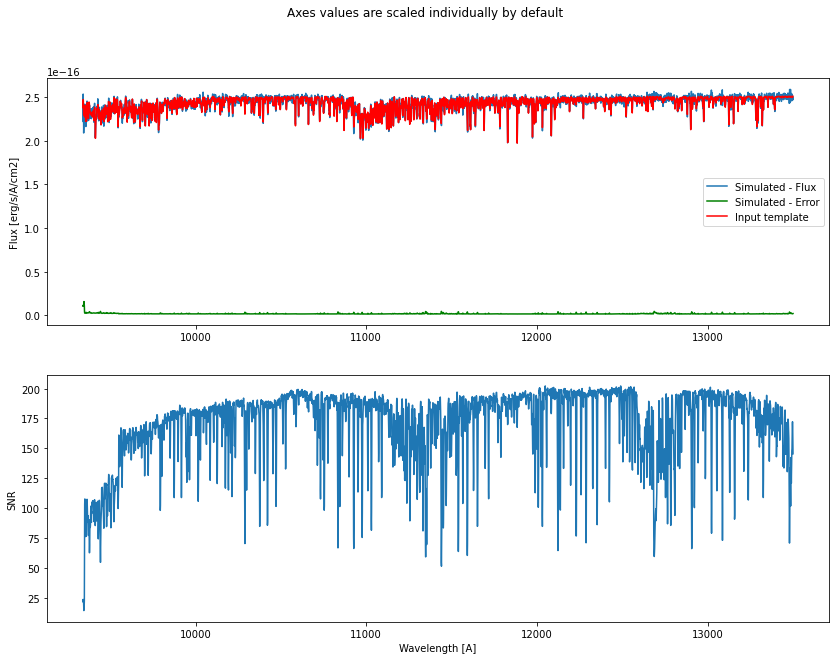

In [4]:
results = run(template_file, Obs_conf, mag, mag_type = mag_type,  type_source = "point-source", filter_name = filter_name,  atm_disp = True, template_path = template_path, verbose=False, save_plots = True, save_fits = False, debug = False)

###  Exemple 2 : Run moons 1D in 3 band 
The following code shows how to run moons1D:
  - with observing parameters stored in a configuration file 
  - Apply extinction to the template (and redshift)
  - computes expected spectrum in the 3 band
  - plot results


In [5]:
#Load observing parameters from a configuration file. 
from configobj import ConfigObj
Obs_conf= ConfigObj('SingleSource_config.ini')


Extinction is defined as:
  $R(V) = \frac{A(V)}{E(B-V)}$

Moons1D has the folowing pre-defined extinction models:   
  
|Name|Description|Reference|
|---|---|---|
|mwavg|Milky Way Diffuse, R(V)=3.1 | Cardelli et al. (1989)
|mwdense|Milky Way Dense, R(V)=5.0 ||
|mwrv21|Milky Way CCM, R(V)=2.1||
|mwrv4|Milky Way CCM, R(V)=4.0||
|lmc30dor|LMC Supershell, R(V)=2.76|Gordon et al. (2003)|
|lmcavg|LMC Average, R(V)=3.41||
|smcbar|SMC Bar, R(V)=2.74||
|xgalsb| Starburst, R(V)=4.0 (attenuation law)| Calzetti et al. (2000)|

To apply extinction to the input source, provide $E(B-V)$ and the name of the extinction law.

In [6]:
#Apply extinction curve for Milky Way Diffuse, R(V)=3.1, with E(B-V)=1.3 to the composite spectrum:
E_BV = 0.05
Extinction_model='mwavg'
redshift = 0.

In [7]:
results = run(template_file, Obs_conf, mag, mag_type = mag_type,  type_source = type_source, filter_name = filter_name, redshift = redshift, Extinction_model = Extinction_model , E_BV = E_BV ,atm_disp = True, template_path = template_path, verbose=False, save_plots = False, save_fits = False, debug = False)

[INFO] | FILTER PROPERTIES
[INFO] |--- Name J 
[INFO] |--- Lambda average: 12200.0 Angstrom 
[INFO] |--- Lambda width:(rectangular) 20.0 Angstrom 
[INFO] | TEMPLATE PROPERTIES
[INFO] |--- Name input_stellar_template.fits 
[INFO] |--- point-source
[INFO] |--- E(B-V)= 0.05 mwavg
[INFO] |--- Redshift 0.0
################ RI ###############
[INFO] | GENERATE DISPERSION AXIS:
[INFO] |--- [Wave range]= 7650.000000 - 8980.000000 Angstrom
[INFO] |--- [Spectral Resolution Element]= 0.903804
[INFO] |--- [dispersion]= 0.334742 Angstrom / pix
[INFO] |--- [npix]= 3973.205051 pix
[INFO] | LOAD TELESCOPE TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/telescope_eff.txt
[INFO] | LOAD INSTRUMENT TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/throughput_RI_worst.txt
[INFO] | LOAD DETECTOR TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/mo

The output variable from the run() function is a dictionary with three keys, corresponding to the three bands. Each key contains a 2d array with four column containing:

    - Column 0: wavelengths (Angstrom)
    - Column 1: input model fluxes (erg/s/cm^2/A)
    - Column 2: mock observed fluxes (erg/s/cm^2/A)
    - Column 3: mock observational errors (erg/s/cm^2/A)

In [8]:
plt.figure()
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(results['RI'][:,0],results['RI'][:,2], label = 'RI')
plt.plot(results['YJ'][:,0],results['YJ'][:,2], label = 'YJ')
plt.plot(results['H'][:,0],results['H'][:,2], label = 'H')
plt.xlabel("Wavelength [A]")
plt.ylabel("Flux [erg/s/cm2/A]")
plt.legend()
plt.tight_layout()
plt.show()

## Exemple 3: Normalised template to a pre-defined filter

Templates can be normalised to a pre-defined filter: bessel_j,bessel_h,bessel_k,cousins_r,cousins_i,johnson_u,johnson_b,johnson_v,johnson_r,johnson_i,johnson_j,johnson_k, 2mass_j, 2mass_h, 2mass_ks, sdss_u, sdss_r,sdss_g, sdss_i, sdss_z. 

  

In [9]:
mag= 15.5 
mag_type = "AB"
filter_name = "bessel_j"
type_source = "point-source"

Obs_conf = {}
Obs_conf['R_mode'] = 'HR'
Obs_conf['observing_mode'] = 'STARE'
Obs_conf['band'] = 'YJ'
Obs_conf['ndit'] = 12
Obs_conf['dit'] = 300.
Obs_conf['OB_name'] = 'Exemple3'
Obs_conf['airmass'] = 1
Obs_conf['seeing'] = 1.2

In [10]:
results = run(template_file, Obs_conf, mag, mag_type = mag_type,  type_source = "point-source", filter_name = filter_name,  atm_disp = True, template_path = template_path, verbose=False, save_plots = True, save_fits = False, debug = False)

[INFO] | FILTER PROPERTIES
[INFO] |--- Name bessel_j 
[INFO] |--- Lambda average: 12369.874483792082 Angstrom 
[INFO] |--- Lambda width:(rectangular) 2034.0425592541505 Angstrom 
[INFO] | TEMPLATE PROPERTIES
[INFO] |--- Name input_stellar_template.fits 
[INFO] |--- point-source
[INFO] |--- E(B-V)= 0.0 mwavg
[INFO] |--- Redshift 0.0
[INFO] | GENERATE DISPERSION AXIS:
[INFO] |--- [Wave range]= 9340.000000 - 13500.000000 Angstrom
[INFO] |--- [Spectral Resolution Element]= 2.655814
[INFO] |--- [dispersion]= 0.983635 Angstrom / pix
[INFO] |--- [npix]= 4229.211909 pix
[INFO] | LOAD TELESCOPE TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/telescope_eff.txt
[INFO] | LOAD INSTRUMENT TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1d/moons1d/models/Instrument/throughput_YJ_worst.txt
[INFO] | LOAD DETECTOR TRANSMISSION:
[INFO] |--- [File]= /Users/lovelace/Documents/MOONS_TW/Simulations/moons1

<Figure size 864x288 with 0 Axes>